In [108]:
#https://towardsdatascience.com/introduction-to-markov-chain-programming-8ddbe0ac1c84#:~:text=Markov%20Chain%20is%20a%20mathematical,predicting%20the%20next%20day's%20weather.
#alternative library PyDTMC
#https://pypi.org/project/PyDTMC/
import numpy as np
import random as rm

In [109]:
states = ["sunny", "rainy"]
transitions = [["SS", "SR"],["RS", "RR"]]
T = [[0.9, 0.1],[0.5, 0.5]]

In [110]:
def weather_forecast(n_days, weather_today="sunny"):
    weather_list = [weather_today]
    n = 0
    prob = 1.0    
    while n != n_days:
        if weather_today == "sunny":
            change = np.random.choice(transitions[0], p=T[0])
            if change == "SS":
                prob = prob * T[0][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[0][1]
                weather_list.append(states[1])        
                
        else:
            change = np.random.choice(transitions[1], p=T[1])
            if change == "RS":
                prob = prob * T[1][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[1][1]
                weather_list.append(states[1])        
        n = n + 1        
    return weather_list

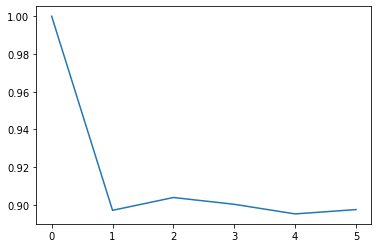

In [111]:
ndays = 5
prediction = np.zeros(shape=(ndays+1))
tests = 10000

import matplotlib.pyplot as plt

for i in range(0,tests):
    future_weathers = weather_forecast(n_days = ndays)
    prediction += np.where(np.array(future_weathers)=='sunny',1,0)
    
plt.plot(prediction/tests)
